<a href="https://colab.research.google.com/github/lcn781/Mod7---Arvore-I/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/demo01_limpo.csv')
df.shape


(6770, 30)

In [2]:
print("Distribuição da variável resposta 'mau':")
print(df['mau'].value_counts())
print(f"\nProporção de maus pagadores (1): {df['mau'].mean()*100:.2f}%")
print(f"Proporção de bons pagadores (0): {(1-df['mau'].mean())*100:.2f}%")


Distribuição da variável resposta 'mau':
mau
0    6472
1     298
Name: count, dtype: int64

Proporção de maus pagadores (1): 4.40%
Proporção de bons pagadores (0): 95.60%


In [3]:
y = df['mau']
X = df.drop(columns=['mau'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,)

print("\n" + "="*50)
print("DIVISÃO DOS DADOS")
print("="*50 + "\n")
print(f"Total de amostras: {len(df)}")
print(f"Treino - X: {X_train.shape[0]} amostras ({len(X_train)/len(df)*100:.2f}%)")
print(f"Validação - X: {X_test.shape[0]} amostras ({len(X_test)/len(df)*100:.2f}%)")
print(f"Número de variáveis: {X_train.shape[1]}")


DIVISÃO DOS DADOS

Total de amostras: 6770
Treino - X: 4739 amostras (70.00%)
Validação - X: 2031 amostras (30.00%)
Número de variáveis: 29


In [13]:
print(f"Treino - X: {X_train.shape} - y: {y_train.shape}")
print(f"Validação - X: {X_test.shape}, {y_test.shape}")
print(f"Proporção treino: {len(X_test)/len(df):.2%}")

Treino - X: (4739, 29) - y: (4739,)
Validação - X: (2031, 29), (2031,)
Proporção treino: 30.00%


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [14]:
#1

clf_dt = DecisionTreeClassifier(random_state=123)

In [15]:
#2

clf_dt.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
print(f"Profundidade da árvore: {clf_dt.get_depth()}")
print(f"Número de folhas: {clf_dt.get_n_leaves()}")

Modelo treinado com sucesso!
Profundidade da árvore: 23
Número de folhas: 240


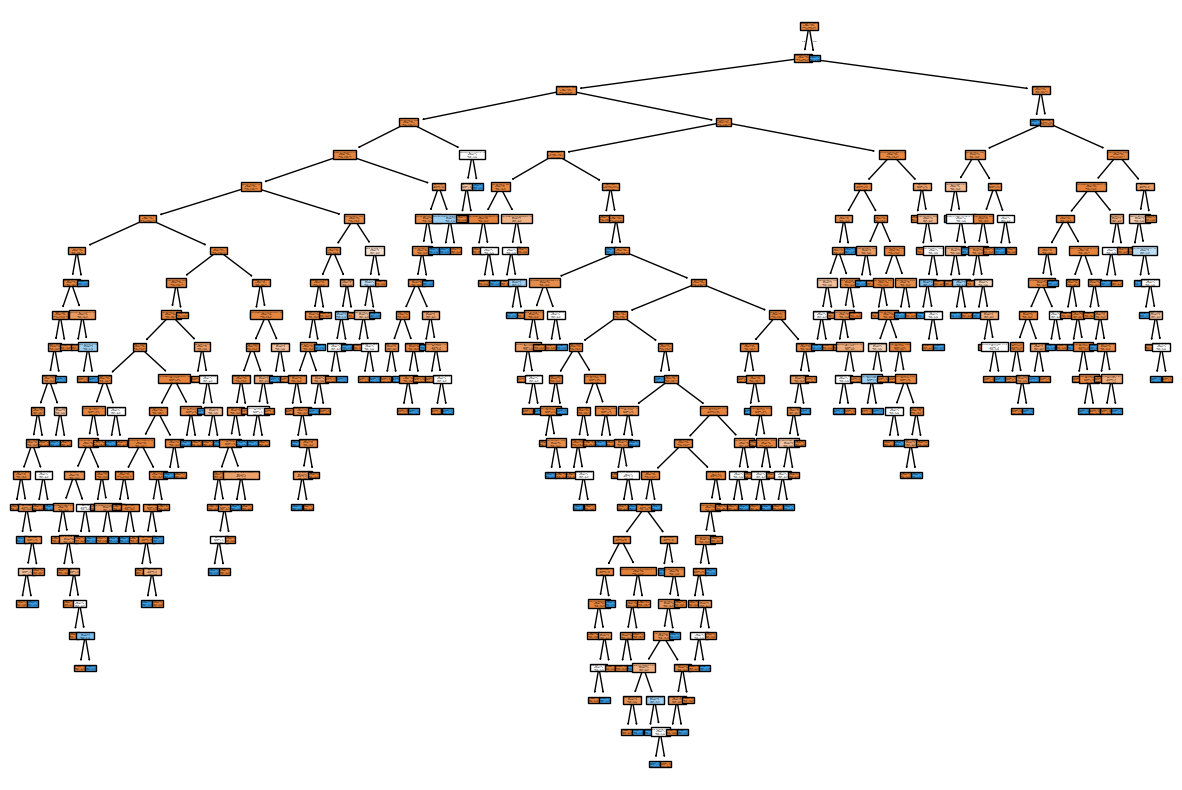

In [16]:
#3

plt.figure(figsize=(15,10))
plot_tree(clf_dt, filled=True, class_names=['mau', 'bom'], feature_names=X.columns)

plt.show()

In [18]:
#4 Produza uma visualização da matriz de classificação (ou matriz de confusão) -
# coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas,
# são essas as decisões que se podem tomar com propostas de crédito.

y_pred_treino = clf_dt.predict(X_train)


print("Matriz de Confusão - Treino")
print("="*50)
cm_treino = confusion_matrix(y_train, y_pred_treino)
print("                Previsto")
print("                 0 (bom)        1(mau)")
print(f"Real 0 (bom)    {cm_treino[0,0]:6d}      {cm_treino[0,1]:6d}")
print(f"     1 (mau)    {cm_treino[1,0]:6d}      {cm_treino[1,1]:6d}")




Matriz de Confusão - Treino
                Previsto
                 0 (bom)        1(mau)
Real 0 (bom)      4536           0
     1 (mau)         0         203


In [19]:
print(cm_treino)

[[4536    0]
 [   0  203]]


In [20]:
#5 Calcule a acurácia na base de treinamento

acuracia_treino = accuracy_score(y_train, y_pred_treino)

print(f"Acurácia na base de treinamento: {acuracia_treino*100:.2f}%")

Acurácia na base de treinamento: 100.00%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [21]:
#1 Classifique a base de teste de acordo com a árvore que você treinou no item 2.

y_pred_teste = clf_dt.predict(X_test)

In [22]:
#2 Produza a visualização da matriz de confusão para a base de teste.

cm_teste = confusion_matrix(y_test, y_pred_teste)


print("Matriz de Confusão - Teste")
print("="*50)
print("                Previsto")
print("                 0 (bom)        1(mau)")
print(f"Real 0 (bom)    {cm_teste[0,0]:6d}      {cm_teste[0,1]:6d}")
print(f"     1 (mau)    {cm_teste[1,0]:6d}      {cm_teste[1,1]:6d}")

Matriz de Confusão - Teste
                Previsto
                 0 (bom)        1(mau)
Real 0 (bom)      1876          60
     1 (mau)        46          49


In [23]:
#3 Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

acuracia_teste = accuracy_score(y_test, y_pred_teste)

print(f"Acurácia na base de teste: {acuracia_teste*100:.2f}%")

Acurácia na base de teste: 94.78%


In [24]:
#4 Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.
# Use o random_state = 123. Avalie a matriz de classificação.
#Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf_dt2 = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
clf_dt2.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
print(f"Profundidade da árvore: {clf_dt2.get_depth()}")
print(f"Número de folhas: {clf_dt2.get_n_leaves()}")

Modelo treinado com sucesso!
Profundidade da árvore: 10
Número de folhas: 73


In [25]:
y_pred_treino2 = clf_dt2.predict(X_train)


print("Matriz de Confusão - Treino")
print("="*50)
cm_treino2 = confusion_matrix(y_train, y_pred_treino2)
print("                Previsto")
print("                 0 (bom)        1(mau)")
print(f"Real 0 (bom)    {cm_treino2[0,0]:6d}      {cm_treino2[0,1]:6d}")
print(f"     1 (mau)    {cm_treino2[1,0]:6d}      {cm_treino2[1,1]:6d}")


Matriz de Confusão - Treino
                Previsto
                 0 (bom)        1(mau)
Real 0 (bom)      4530           6
     1 (mau)       100         103


In [26]:
acuracia_teste2 = accuracy_score(y_train, y_pred_treino2)

print(f"Acurácia na base de teste: {acuracia_teste2*100:.2f}%")

Acurácia na base de teste: 97.76%


In [16]:
#5 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?



In [27]:
total_contratos = len(df)
bons_pagadores = (df['mau'] == 0).sum()
maus_pagadores = (df['mau'] == 1).sum()

print("="*50)
print("ANÁLISE DA BASE")
print("="*50)
print(f"Total de contratos: {total_contratos}")
print(f"Bons pagadores (0): {bons_pagadores} ({bons_pagadores/total_contratos*100:.1f})")
print(f"Maus pagadores (1): {maus_pagadores} ({maus_pagadores/total_contratos*100:.1f})")

ANÁLISE DA BASE
Total de contratos: 6770
Bons pagadores (0): 6472 (95.6)
Maus pagadores (1): 298 (4.4)


In [28]:
# Considerando sua variável resposta 'mau' (1 = mau, 0 = bom)
# Se classificar tudo como 0 (bom):

acuracia_baseline = (df['mau'] == 0).mean()  # proporção de zeros

print(f"Acurácia classificando tudo como 'bom': {acuracia_baseline:.3f}")
print(f"Isso representa {acuracia_baseline*100:.1f}% de acertos")

Acurácia classificando tudo como 'bom': 0.956
Isso representa 95.6% de acertos


In [29]:
y_real = df['mau']
y_pred_tudobom = np.zeros(len(df))

acuracia_tudobom = accuracy_score(y_real, y_pred_tudobom)

print("\n" + "="*50)
print("CLASSIFICANDO TUDO COMO BOM")
print("="*50 + "\n")
print(f"Acurácia obtida: {acuracia_tudobom:.3f} ({acuracia_tudobom*100:.1f}%)")


CLASSIFICANDO TUDO COMO BOM

Acurácia obtida: 0.956 (95.6%)


In [39]:


print("\n" + "="*50)
print("COMPARAÇÃO FINAL")
print("="*50)
print(f"Acurácia do modelo ingênuo (tudo bom): {acuracia_tudobom:.3f}")
print(f"Acurácia da árvore de decisão: {acuracia_teste2:.3f}")

if acuracia_teste2 > acuracia_tudobom:
    print(f"\n✅ Sua árvore é {acuracia_teste2 - acuracia_tudobom:.3f} melhor que o modelo ingênuo")
    print("   Está aprendendo algo relevante!")
else:
    print(f"\n⚠️  Sua árvore é pior que classificar tudo como 'bom'")
    print("   Precisa ajustar o modelo!")


COMPARAÇÃO FINAL
Acurácia do modelo ingênuo (tudo bom): 0.956
Acurácia da árvore de decisão: 0.978

✅ Sua árvore é 0.022 melhor que o modelo ingênuo
   Está aprendendo algo relevante!
